In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
data['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [5]:
data.shape

(1025, 14)

In [6]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

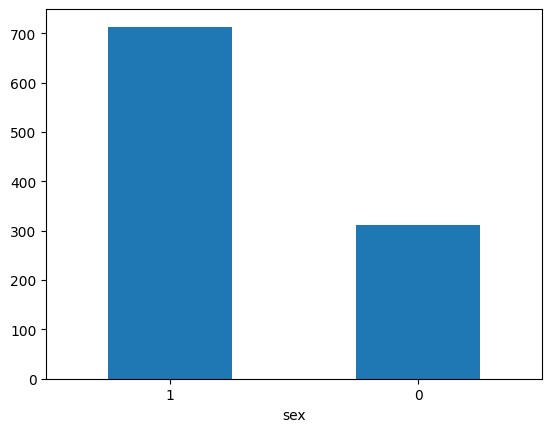

In [7]:
data['sex'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

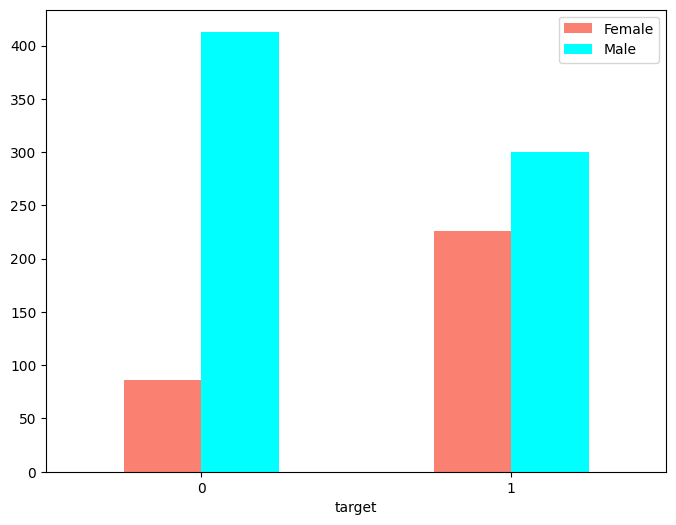

In [9]:
pd.crosstab(data.target, data.sex).plot(kind="bar", figsize = (8,6), color = ['salmon', 'cyan'])
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0)

Text(0.5, 0, 'age of patients ')

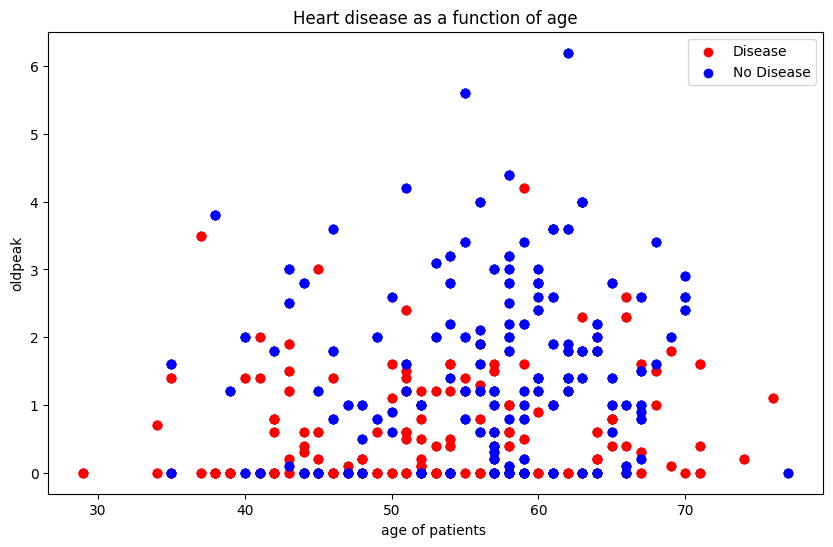

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(data.age[data.target==1],
            data.oldpeak[data.target==1],
            color = 'red')
plt.scatter(data.age[data.target == 0],
            data.oldpeak[data.target == 0],
            color = 'blue')
plt.legend(['Disease', 'No Disease']);
plt.ylabel("oldpeak")
plt.title("Heart disease as a function of age")
plt.xlabel("age of patients ")

In [11]:
data.age[data.target == 1]

5       58
10      71
12      34
15      34
16      51
        ..
1011    45
1014    44
1019    47
1020    59
1023    50
Name: age, Length: 526, dtype: int64

<Axes: ylabel='Frequency'>

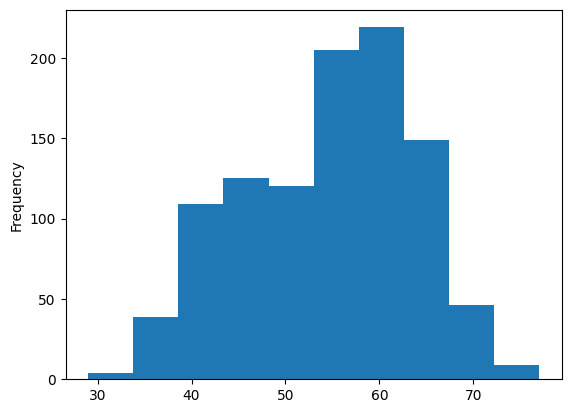

In [12]:
data.age.plot.hist()

In [13]:
corr_mat = data.corr()

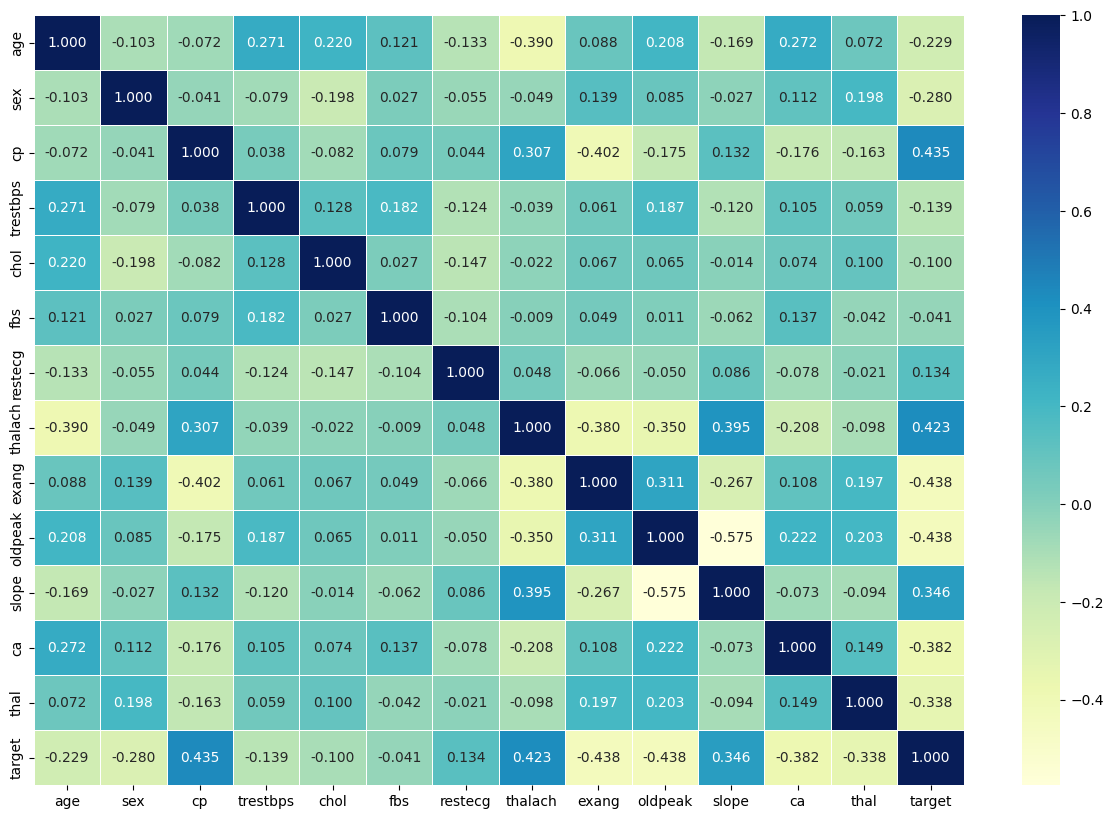

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_mat, annot = True, linewidths = 0.4, cmap = 'YlGnBu', fmt = '.3f')

In [16]:
data.sample(frac = 1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
610,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
183,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
68,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
293,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
173,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
665,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


In [17]:
X = data.drop('target', axis = 1)
Y = data['target']

In [18]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [19]:
X.loc[[0]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [20]:
# train_test - split

In [22]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [24]:
X_train.shape

(820, 13)

In [25]:
Y_train.shape

(820,)

In [26]:
X_test.shape

(205, 13)

In [27]:
Y_test.shape

(205,)

In [28]:
Y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

In [29]:
#importing trainig models

In [30]:
from sklearn import linear_model as lim
from sklearn import neighbors as nei
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [31]:
%%time
models = {"LogisticRegression": lim.LogisticRegression(),
          "KNN": nei.KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Ridge Classification": lim.RidgeClassifier(),
          "SVM": svm.SVC()
          }

def scoreModel(models, train_x, test_x, train_y, test_y):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
      model.fit(train_x, train_y)
      model_scores[name] = model.score(test_x, test_y)
    return model_scores

CPU times: total: 0 ns
Wall time: 0 ns


In [32]:
model_scores = scoreModel(models, X_train, X_test, Y_train, Y_test)
model_scores

c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'Ridge Classification': 0.8097560975609757,
 'SVM': 0.6829268292682927}

In [33]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])

<Axes: >

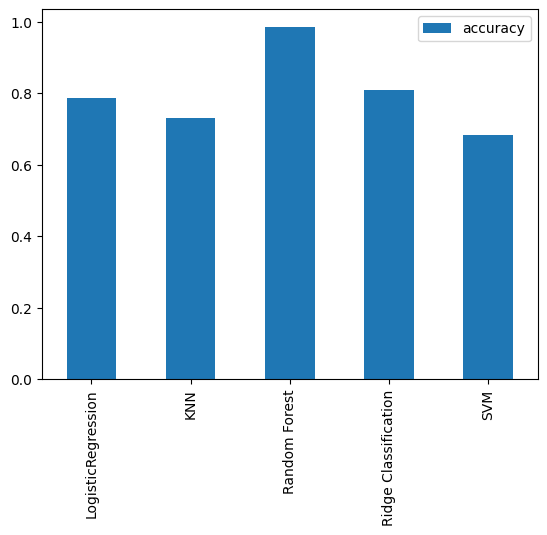

In [34]:
model_compare.T.plot.bar()
# plt.xticks(rotation=0)

In [ ]:
# Tuning the Logistic Regression
train_scores = []
test_scores = []

LR = lim.LogisticRegression()
qwe = range(50, 500, 5)

for i in qwe:
  LR.set_params(max_iter = i)
  LR.fit(X_train, Y_train)
  train_scores.append(LR.score(X_train, Y_train))
  test_scores.append(LR.score(X_test, Y_test))
train_scores
test_scores

In [ ]:
# Tuning the Random Forest
train_scores = []
test_scores = []

RN = RandomForestClassifier()
qwe = range(50, 500, 5)

for i in qwe:
  # RN.set_params(max_iter = i)
  RN.fit(X_train, Y_train)
  train_scores.append(RN.score(X_train, Y_train))
  test_scores.append(RN.score(X_test, Y_test))
train_scores
test_scores

In [41]:
# Tuning the SVM
train_scores = []
test_scores = []

SV = svm.SVC()
qwe = range(50, 500, 5)

for i in qwe:
  SV.set_params(max_iter = i)
  SV.fit(X_train, Y_train)
  train_scores.append(SV.score(X_train, Y_train))
  test_scores.append(SV.score(X_test, Y_test))
train_scores
test_scores

c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=55).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=65).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\U

[0.6048780487804878,
 0.6,
 0.5414634146341464,
 0.5317073170731708,
 0.5170731707317073,
 0.5073170731707317,
 0.48292682926829267,
 0.4878048780487805,
 0.4926829268292683,
 0.4878048780487805,
 0.47804878048780486,
 0.48292682926829267,
 0.5073170731707317,
 0.5073170731707317,
 0.5024390243902439,
 0.5024390243902439,
 0.5024390243902439,
 0.526829268292683,
 0.5073170731707317,
 0.5073170731707317,
 0.5317073170731708,
 0.5073170731707317,
 0.5073170731707317,
 0.5121951219512195,
 0.4926829268292683,
 0.5121951219512195,
 0.5121951219512195,
 0.5317073170731708,
 0.5024390243902439,
 0.5073170731707317,
 0.526829268292683,
 0.5170731707317073,
 0.5414634146341464,
 0.5317073170731708,
 0.5317073170731708,
 0.5073170731707317,
 0.5073170731707317,
 0.5024390243902439,
 0.5073170731707317,
 0.5024390243902439,
 0.5024390243902439,
 0.5073170731707317,
 0.526829268292683,
 0.6390243902439025,
 0.6341463414634146,
 0.6292682926829268,
 0.6926829268292682,
 0.6487804878048781,
 0.6439

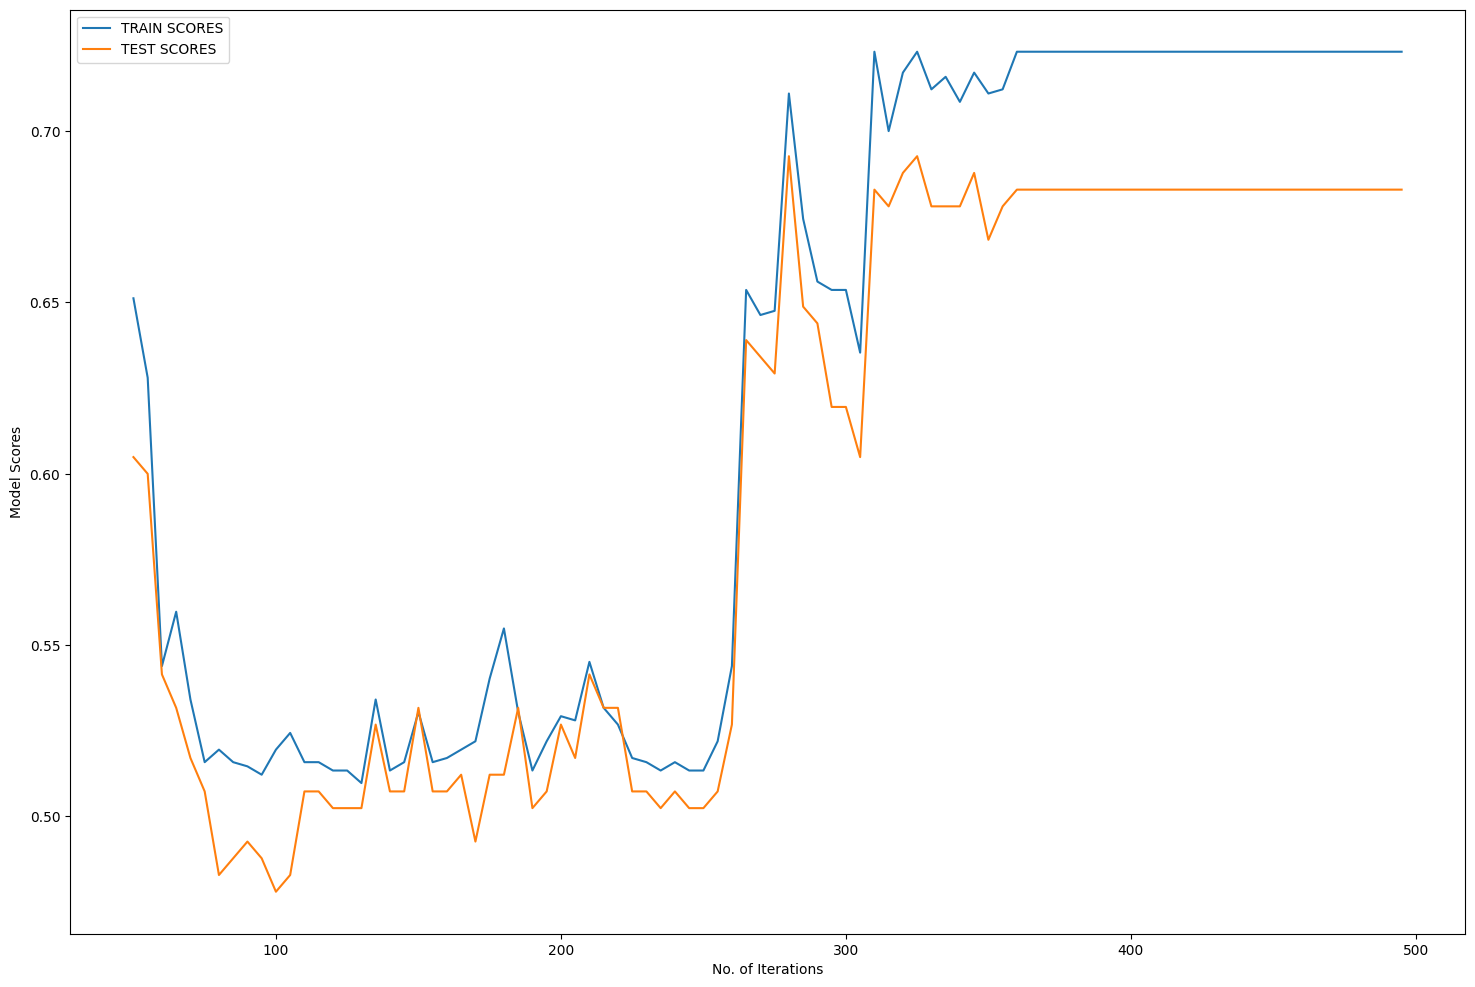

In [42]:
qwe = range(50, 500, 5)
fig, ax = plt.subplots(figsize = (18, 12))
ax.plot(qwe, train_scores, label = "TRAIN SCORES")
ax.plot(qwe, test_scores, label = "TEST SCORES")
plt.xlabel('No. of Iterations')
plt.ylabel('Model Scores')
plt.legend()

Using Randomized Grid Search

In [43]:
reg_grid = {'C': np.logspace(-4, 4, 20),
            'solver': ['lbfgs']}

In [44]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
rsg = RandomizedSearchCV(lim.LogisticRegression(),
                         param_distributions = reg_grid,
                         cv = 5,
                         n_iter = 10,
                         verbose = True)
rsg.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs']},
                   verbose=True)

In [45]:
rsg.best_params_

{'solver': 'lbfgs', 'C': 3792.690190732246}

In [46]:
rsg.best_score_

0.853658536585366

In [47]:
rsg.best_estimator_

LogisticRegression(C=3792.690190732246)

In [48]:
rsg.best_index_

8

In [49]:
rsg.score(X_test, Y_test)

0.8

In [50]:
y_preds = rsg.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [51]:
Y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

Text(0, 0.5, 'original')

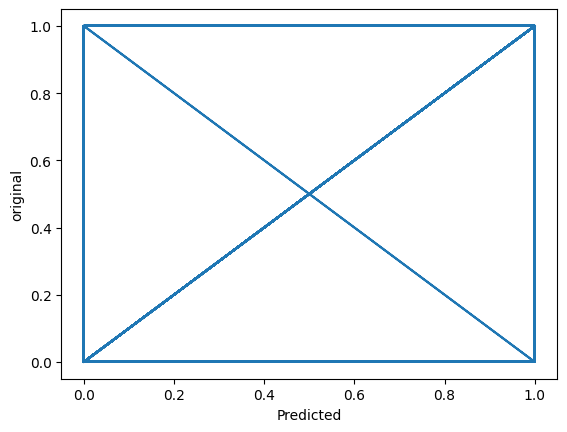

In [52]:
plt.plot(y_preds, Y_test, label = "comparison")
plt.xlabel("Predicted")
plt.ylabel("original")

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score as cvs

In [54]:
#confusion matrix
confusion_matrix(y_preds, Y_test)

array([[74, 13],
       [28, 90]], dtype=int64)

In [55]:
conf_mat = pd.DataFrame(confusion_matrix(y_preds, Y_test))
conf_mat

,0,1
0,74,13
1,28,90


Text(50.722222222222214, 0.5, 'True values')

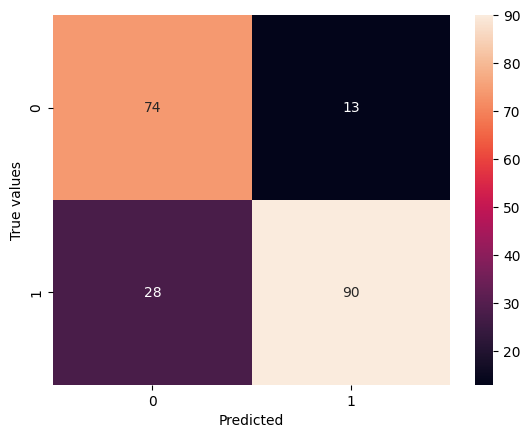

In [56]:
sns.heatmap(conf_mat, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True values")

In [57]:
print(classification_report(Y_test, y_preds, digits = 3))

              precision    recall  f1-score   support

           0      0.851     0.725     0.783       102
           1      0.763     0.874     0.814       103

    accuracy                          0.800       205
   macro avg      0.807     0.800     0.799       205
weighted avg      0.806     0.800     0.799       205



In [58]:
rsg.best_params_

{'solver': 'lbfgs', 'C': 3792.690190732246}

In [59]:
fineTunedModel = lim.LogisticRegression(C = 3792.690190732246, solver = 'lbfgs')

In [60]:
cross_v = cvs(fineTunedModel, X, Y, cv = 5, scoring = "accuracy")

c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [61]:
cross_v

array([0.87317073, 0.84390244, 0.86341463, 0.8195122 , 0.8195122 ])

In [62]:
cross_v_accu = np.mean(cross_v)

In [63]:
cross_v_accu

0.8439024390243903

In [64]:
cross_v = cvs(fineTunedModel, X, Y, cv = 5, scoring = "precision")

c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [65]:
cross_v

array([0.83760684, 0.8173913 , 0.83478261, 0.79310345, 0.80530973])

In [66]:
cross_v_precis = np.mean(cross_v)

In [67]:
cross_v_precis

0.8176387866878905

In [68]:
cross_v = cvs(fineTunedModel, X, Y, cv = 5, scoring = "recall")

c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [69]:
cross_v

array([0.93333333, 0.8952381 , 0.91428571, 0.87619048, 0.85849057])

In [70]:
cross_v_rec = np.mean(cross_v)

In [71]:
cross_v_rec

0.895507637017071

In [72]:
cross_v = cvs(fineTunedModel, X, Y, cv = 5, scoring = "f1")
cross_v_f1 = np.mean(cross_v)

c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [73]:
cross_v_f1

0.8547570047972949

In [74]:
cv_metrics = pd.DataFrame({'Accuracy': cross_v_accu,
                           'Precison': cross_v_precis,
                           'Recall': cross_v_rec,
                           'f1': cross_v_f1},
                          index = [0])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precison'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'f1')])

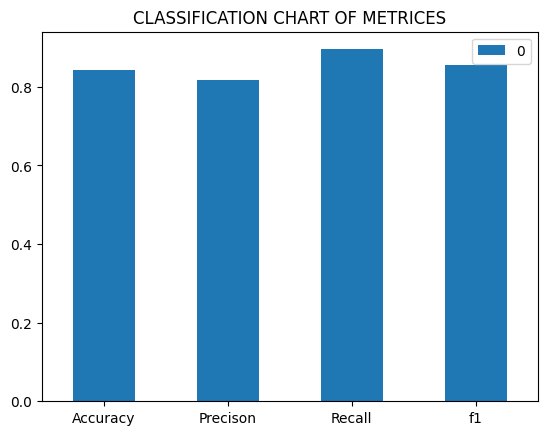

In [75]:
cv_metrics.T.plot.bar(title = "CLASSIFICATION CHART OF METRICES")
plt.xticks(rotation = 0)

In [76]:
fineTunedModel.fit(X_train, Y_train)

c:\Users\Abhinav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3792.690190732246)

In [77]:
fineTunedModel.coef_

array([[ 0.01980988, -1.60754156,  0.84702558, -0.01414638, -0.00751002,
        -0.2264912 ,  0.46992206,  0.03741347, -0.7914078 , -0.66917941,
         0.61030031, -0.80051495, -1.04027729]])

In [78]:
feature_dict = dict(zip(data.columns, list(fineTunedModel.coef_[0])))

In [79]:
feature_dict

{'age': 0.019809877864225726,
 'sex': -1.607541557860225,
 'cp': 0.8470255754916677,
 'trestbps': -0.0141463791657519,
 'chol': -0.0075100187205710345,
 'fbs': -0.22649119829549005,
 'restecg': 0.4699220573171597,
 'thalach': 0.037413471943806204,
 'exang': -0.7914077973646454,
 'oldpeak': -0.6691794105416087,
 'slope': 0.6103003080585485,
 'ca': -0.8005149543483828,
 'thal': -1.0402772888672713}

In [80]:
coef = pd.DataFrame(feature_dict, index = [0])

In [81]:
coef

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.01981,-1.607542,0.847026,-0.014146,-0.00751,-0.226491,0.469922,0.037413,-0.791408,-0.669179,0.6103,-0.800515,-1.040277


<Axes: title={'center': 'MOST IMPORTANT VARIABLE FEATURES'}>

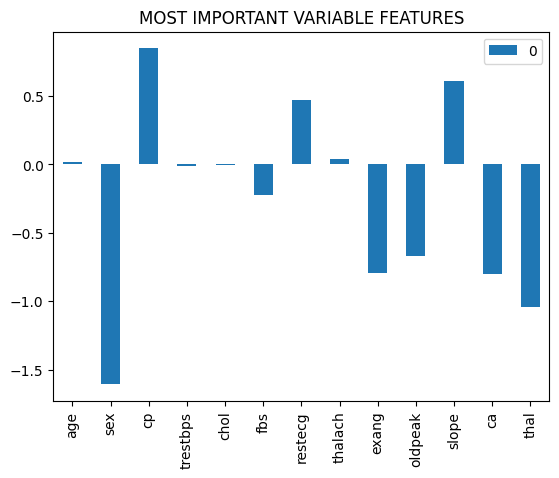

In [82]:
coef.T.plot.bar(title = "MOST IMPORTANT VARIABLE FEATURES")

In [83]:
X.loc[[50]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
50,58,0,3,150,283,1,0,162,0,1.0,2,0,2


In [84]:
fineTunedModel.predict(X.loc[[50]])

array([1], dtype=int64)